In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Set backend of matplotlib to inline to view visuals in Jupyter Notebook
%matplotlib inline

In [54]:
# Load dataset

df = pd.read_csv("user_journey.csv")
df.describe()

,Event_SoID,Event_SessionKey,TrackingEventID,SessionRank,SessionRankNoModals,CuID,LoginStatusFlag,ModalClick,EventType,Event_MkcID,...,SecondsToNextPageView,RemainingVisitHasProductView,RemainingVisitHasAddToCart,RemainingVisitHasCheckoutView,ConvertedSession,SessionRevenue,OrID,GrossRevenueStable,TotalPageLoadTime,SpeedIndex
count,14470.0,1.447000e+04,1.447000e+04,14470.000000,14470.000000,1.447000e+04,14470.000000,14470.0,0.0,14470.000000,...,12619.000000,14470.000000,14470.000000,14470.000000,14470.000000,14470.000000,0.0,0.0,8.929000e+03,8.632000e+03
mean,49.0,7.485977e+15,4.010186e+18,196.090048,19.636835,-9.344024e+17,5.700138,0.0,NaN,46.543331,...,105.254854,0.831168,0.194955,0.081479,0.067243,15.153290,NaN,NaN,5.073732e+03,2.216582e+03
std,0.0,4.329861e+15,2.920239e+18,359.713914,28.529586,2.124161e+18,5.195214,0.0,NaN,43.446457,...,537.461961,0.374616,0.396180,0.273579,0.250450,70.118818,NaN,NaN,1.816418e+04,1.857169e+04
min,49.0,5.293304e+12,5.293304e+12,1.000000,1.000000,-9.203857e+18,0.000000,0.0,NaN,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,4.790000e+02,9.800000e+01
25%,49.0,3.957042e+15,1.276605e+18,9.000000,3.000000,3.079539e+08,0.000000,0.0,NaN,6.000000,...,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,2.577000e+03,1.128000e+03
50%,49.0,7.684644e+15,3.943165e+18,68.000000,10.000000,3.786200e+09,3.000000,0.0,NaN,31.000000,...,31.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,3.551000e+03,1.505500e+03
75%,49.0,1.112309e+16,6.554861e+18,237.000000,24.000000,5.008689e+09,11.000000,0.0,NaN,62.000000,...,60.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,4.869000e+03,2.109000e+03
max,49.0,1.479767e+16,9.222575e+18,3848.000000,256.000000,5.422569e+09,13.000000,0.0,NaN,135.000000,...,11957.000000,1.000000,1.000000,1.000000,1.000000,873.210000,NaN,NaN,1.428558e+06,1.688280e+06


In [74]:
df.head()

,SessionStartDate,Event_SoID,Event_SessionKey,TrackingEventID,Event_Timestamp,SessionRank,SessionRankNoModals,Event_BrowserGuID,CuID,VisitorType,...,SecondsToNextPageView,RemainingVisitHasProductView,RemainingVisitHasAddToCart,RemainingVisitHasCheckoutView,ConvertedSession,SessionRevenue,OrID,GrossRevenueStable,TotalPageLoadTime,SpeedIndex
0,2020-02-29,49,5293303984603,5293303984603,2020-02-29 14:56:27,1,1,AC10230F-553C-0170-6106-1F6F2DE05B02,2393399141,Activated Customer,...,32.0,1,0,0,0,0.00,NaN,NaN,3457.0,2165.0
1,2020-02-29,49,5293303984603,7203270569441659706,2020-02-29 14:56:59,3,2,AC10230F-553C-0170-6106-1F6F2DE05B02,2393399141,Activated Customer,...,NaN,1,0,0,0,0.00,NaN,NaN,3679.0,2574.0
2,2020-02-29,49,21522627820113,21522627820113,2020-02-29 12:50:50,1,1,23F584C2-5E5A-A472-26B4-0BE52F9EF202,5310190262,Returning Visitor,...,NaN,1,0,0,0,0.00,NaN,NaN,6007.0,3934.0
3,2020-02-29,49,30027553846411,30027553846411,2020-02-29 01:43:50,1,1,23F7265C-5E5A-0821-54C9-0C1624E3CC02,-481848622244162661,New Visitor,...,NaN,1,0,0,0,0.00,NaN,NaN,4328.0,2522.0
4,2020-02-29,49,39407566268386,39407566268386,2020-02-29 20:30:25,1,1,A2D0206F-5C8E-E0C2-2321-71CF20786702,4777486105,Activated Customer,...,1.0,1,1,1,1,90.71,NaN,NaN,5040.0,2542.0


In [80]:
list(df)

['SessionStartDate',
 'Event_SoID',
 'Event_SessionKey',
 'TrackingEventID',
 'Event_Timestamp',
 'SessionRank',
 'SessionRankNoModals',
 'Event_BrowserGuID',
 'CuID',
 'VisitorType',
 'MarketingVisitorType',
 'LoginStatusFlag',
 'Event_PageType',
 'ModalClick',
 'EventType',
 'Event_MkcID',
 'Event_PrSKU',
 'AddToCartSKU',
 'RemoveFromCartSKU',
 'AddToIdeaBoardsSKU',
 'CaID',
 'ClID',
 'PSEventID',
 'SolrEventID',
 'SearchTerm',
 'Event_Url',
 'Event_UrlCleaned',
 'Event_RefererUrl',
 'Event_RefererUrlCleaned',
 'Platform',
 'DeviceType',
 'BrowserName',
 'OSName',
 'AppVersion',
 'Channel',
 'CmCode',
 'NavigationType',
 'NavigationPriorRank',
 'NavigationPriorPageType',
 'ClickLocation',
 'Exit',
 'SecondsToNextPageView',
 'RemainingVisitHasProductView',
 'RemainingVisitHasAddToCart',
 'RemainingVisitHasCheckoutView',
 'ConvertedSession',
 'SessionRevenue',
 'OrID',
 'GrossRevenueStable',
 'TotalPageLoadTime',
 'SpeedIndex']

## Question 1: Total visits by landing pages type
(Hint: Landing page is defined as the first page a user visit within the session i.e. Sessionranknomodal =1)

In [22]:
# Get the landing page data where the rank of session = 1

landing_page = df[df['SessionRankNoModals'] == 1]
landing_page.head(5)

,SessionStartDate,Event_SoID,Event_SessionKey,TrackingEventID,Event_Timestamp,SessionRank,SessionRankNoModals,Event_BrowserGuID,CuID,VisitorType,...,SecondsToNextPageView,RemainingVisitHasProductView,RemainingVisitHasAddToCart,RemainingVisitHasCheckoutView,ConvertedSession,SessionRevenue,OrID,GrossRevenueStable,TotalPageLoadTime,SpeedIndex
0,2020-02-29,49,5293303984603,5293303984603,2020-02-29 14:56:27,1,1,AC10230F-553C-0170-6106-1F6F2DE05B02,2393399141,Activated Customer,...,32.0,1,0,0,0,0.00,NaN,NaN,3457.0,2165.0
2,2020-02-29,49,21522627820113,21522627820113,2020-02-29 12:50:50,1,1,23F584C2-5E5A-A472-26B4-0BE52F9EF202,5310190262,Returning Visitor,...,NaN,1,0,0,0,0.00,NaN,NaN,6007.0,3934.0
3,2020-02-29,49,30027553846411,30027553846411,2020-02-29 01:43:50,1,1,23F7265C-5E5A-0821-54C9-0C1624E3CC02,-481848622244162661,New Visitor,...,NaN,1,0,0,0,0.00,NaN,NaN,4328.0,2522.0
4,2020-02-29,49,39407566268386,39407566268386,2020-02-29 20:30:25,1,1,A2D0206F-5C8E-E0C2-2321-71CF20786702,4777486105,Activated Customer,...,1.0,1,1,1,1,90.71,NaN,NaN,5040.0,2542.0
27,2020-02-29,49,42559768936700,42559768936700,2020-02-29 16:17:13,1,1,A2D02065-5E5A-D4D5-40AB-7D689B9F2502,3770900201,Activated Customer,...,NaN,0,0,0,0,0.00,NaN,NaN,2950.0,1662.0


In [23]:
# Total visits by landing pages type

landing_visit = landing_page[['Event_PageType','SessionRankNoModals']].groupby('Event_PageType').count()
landing_visit.head(10)

,SessionRankNoModals
Event_PageType,
ABOUTUSCONTACTUS,1
ACCOUNTEMAILPREFERENCES,9
ACCOUNTLOGIN,7
ACCOUNTMYACCOUNT,3
APPMARKETING,1
BOARDYOUROWN,2
BRANDAUTOGENERATED,4
BRANDCUSTOMPAGE,1
BRANDINSPIRATIONMEDIA,1


In [24]:
# Top 10 most popular landing pages type

top10 = landing_visit.sort_values(['SessionRankNoModals'], ascending=False).head(10)
top10.rename(columns = {'SessionRankNoModals':'Total visits'}, inplace = True)
top10

,Total visits
Event_PageType,
HOMEPAGE,476
SUPERBROWSEHOTDEALS,473
SUPERBROWSECATEGORY,113
KEYWORDSEARCH,110
GATEWAY,106
SUPERBROWSECATEGORY1ATTRIBUTES,96
PRODUCTOPTIONSKU,84
DAILYSALESSOLREVENTPAGE,72
PRODUCTSIMPLESKU,51


Text(0.5, 1.0, 'Total of visits by landing page types')

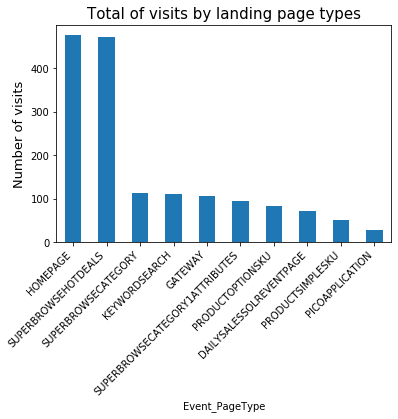

In [25]:
# Plot a bar chart

labels = ['HOMEPAGE','SUPERBROWSEHOTDEALS', 'SUPERBROWSECATEGORY', 'KEYWORDSEARCH', 'GATEWAY', 'SUPERBROWSECATEGORY1ATTRIBUTES', 'PRODUCTOPTIONSKU', 'DAILYSALESSOLREVENTPAGE', 'PRODUCTSIMPLESKU', 'PICOAPPLICATION']
plot = top10.plot.bar(legend = None)
plt.ylabel('Number of visits', fontsize = 13)
plot.set_xticklabels(plot.set_xticklabels(labels), rotation=45, horizontalalignment='right')
plt.title('Total of visits by landing page types', fontsize = 15)

## Question 2. Conversion rate by landing pages type
Conversion Rate = Total Converted/ Total Visits

In [26]:
# Find the number of conversion that each Page type generate

conversion = landing_page[landing_page['ConvertedSession'] == 1][['Event_PageType','ConvertedSession']].groupby('Event_PageType').count()
conversion.rename(columns = {'ConvertedSession':'conversion'}, inplace = True)
conversion

,conversion
Event_PageType,
ACCOUNTMYACCOUNT,1
CHECKOUTBASKET,3
CHECKOUTONEPAGE,1
DAILYSALESSOLREVENTPAGE,1
GENERAL,2
HOMEPAGE,18
KEYWORDSEARCH,1
PICOAPPLICATION,1
PRODUCTOPTIONSKU,4


In [27]:
# Find total_visit of each Page type

total_visit = landing_page[['Event_PageType','ConvertedSession']].groupby('Event_PageType').count()
total_visit.rename(columns = {'ConvertedSession':'total_visit'}, inplace = True)
total_visit

,total_visit
Event_PageType,
ABOUTUSCONTACTUS,1
ACCOUNTEMAILPREFERENCES,9
ACCOUNTLOGIN,7
ACCOUNTMYACCOUNT,3
APPMARKETING,1
BOARDYOUROWN,2
BRANDAUTOGENERATED,4
BRANDCUSTOMPAGE,1
BRANDINSPIRATIONMEDIA,1


In [28]:
# We can see there are some'Event_PageType' values that did not convert buying. 
# Because there are more 'Event_PageType' values in 'total_visit' than in 'convert' dataframe.
# Inner join 'convert' and 'total_visit' into a dataframe to drop 'Event_PageType' values that did not convert buying.

visit_by_page = pd.merge(conversion, total_visit, on='Event_PageType')
visit_by_page

,conversion,total_visit
Event_PageType,,
ACCOUNTMYACCOUNT,1,3
CHECKOUTBASKET,3,21
CHECKOUTONEPAGE,1,1
DAILYSALESSOLREVENTPAGE,1,72
GENERAL,2,4
HOMEPAGE,18,476
KEYWORDSEARCH,1,110
PICOAPPLICATION,1,28
PRODUCTOPTIONSKU,4,84


In [29]:
# Conversion Rate = Total Converted/ Total Visits

conversion_rate = visit_by_page['conversion']/visit_by_page['total_visit']
conversion_rate

Event_PageType
ACCOUNTMYACCOUNT                  0.333333
CHECKOUTBASKET                    0.142857
CHECKOUTONEPAGE                   1.000000
DAILYSALESSOLREVENTPAGE           0.013889
GENERAL                           0.500000
HOMEPAGE                          0.037815
KEYWORDSEARCH                     0.009091
PICOAPPLICATION                   0.035714
PRODUCTOPTIONSKU                  0.047619
PRODUCTSIMPLESKU                  0.019608
SUPERBROWSECATEGORY               0.026549
SUPERBROWSECATEGORY1ATTRIBUTES    0.041667
SUPERBROWSEHOTDEALS               0.019027
dtype: float64

Text(0.5, 1.0, 'Conversion Rate')

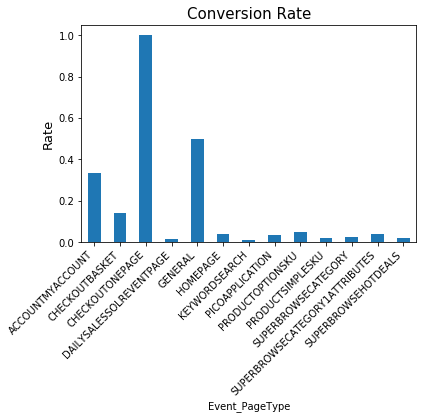

In [30]:
# Plot a bar chart

labels_2 = ['ACCOUNTMYACCOUNT','CHECKOUTBASKET', 'CHECKOUTONEPAGE', 'DAILYSALESSOLREVENTPAGE', 'GENERAL', 'HOMEPAGE', 'KEYWORDSEARCH', 'PICOAPPLICATION', 'PRODUCTOPTIONSKU', 'PRODUCTSIMPLESKU', 'SUPERBROWSECATEGORY', 'SUPERBROWSECATEGORY1ATTRIBUTES', 'SUPERBROWSEHOTDEALS']
plot = conversion_rate.plot.bar(legend = None)
plt.ylabel('Rate', fontsize = 13)
plot.set_xticklabels(plot.set_xticklabels(labels_2), rotation=45, horizontalalignment='right')
plt.title('Conversion Rate', fontsize = 15)

## Question 3.  What are next pages do users navigate to after landing on Homepage? Order by total of visits and conversion rate

In [31]:
# Assume that landing on Homepage is the first step of visitors because landing page type also appears in those middle steps
# Get data of those visitors whose first landing page is 'Homepage' and converted to buy products.

home_conversion = landing_page[(landing_page['Event_PageType']== "HOMEPAGE") & (landing_page['ConvertedSession'] == 1)][['Event_SessionKey','ConvertedSession']].groupby('Event_SessionKey').count()
home_conversion.rename(columns = {'ConvertedSession':'conversion'}, inplace = True)
home_conversion.head(5)

,conversion
Event_SessionKey,
369819461228236,1
391554046481057,1
1876362320570626,1
2843719750804067,1
3422376528965441,1


In [32]:
home_conversion.shape

# "home_conversion" dataframe has 18 rows

(18, 1)

In [33]:
# Get data of total visitors whose first landing page is 'Homepage'

home_total_visit = landing_page[landing_page['Event_PageType']== "HOMEPAGE"][['Event_SessionKey','ConvertedSession']].groupby('Event_SessionKey').count()
home_total_visit.rename(columns = {'ConvertedSession':'total_visit'}, inplace = True)
home_total_visit.head(5)

,total_visit
Event_SessionKey,
60868518997500,1
98916227250560,1
102428397253751,1
112340551624969,1
116698540539521,1


In [34]:
home_total_visit.shape

# "home_total_visit" dataframe has 476 rows

(476, 1)

In [35]:
# Outer join 'home_conversion' and 'home_total_visit' to keep visitor key who landed to Homepage in the first step

visit_home = pd.merge(home_conversion, home_total_visit, on='Event_SessionKey', how='outer')
visit_home

,conversion,total_visit
Event_SessionKey,,
369819461228236,1.0,1
391554046481057,1.0,1
1876362320570626,1.0,1
2843719750804067,1.0,1
3422376528965441,1.0,1
...,...,...
14649938110467099,NaN,1
14752188740400922,NaN,1
14763570255473898,NaN,1


In [36]:
# Get next pages do users navigate to after landing on Homepage order by total of visits and conversion rate.

next_pages = pd.merge(visit_home, df[df['SessionRankNoModals'] > 1],on='Event_SessionKey', how='left')
next_pages = next_pages[['Event_PageType','conversion','total_visit']].groupby('Event_PageType').count().sort_values(['conversion','total_visit'], ascending=False)
next_pages[next_pages['conversion'] > 0] # we select based on behaviours of converted customers

,conversion,total_visit
Event_PageType,,
PRODUCTOPTIONSKU,95,989
CHECKOUTBASKET,40,188
PRODUCTSIMPLESKU,37,396
SUPERBROWSECATEGORY,30,667
SUPERBROWSECATEGORY2ATTRIBUTES,25,254
SUPERBROWSECATEGORY1ATTRIBUTES,24,477
CHECKOUTONEPAGE,20,26
KEYWORDSEARCH,19,372
CHECKOUTRECEIPT,17,17


Text(0.5, 1.0, 'Top 10 most popular next pages after landing Homepage')

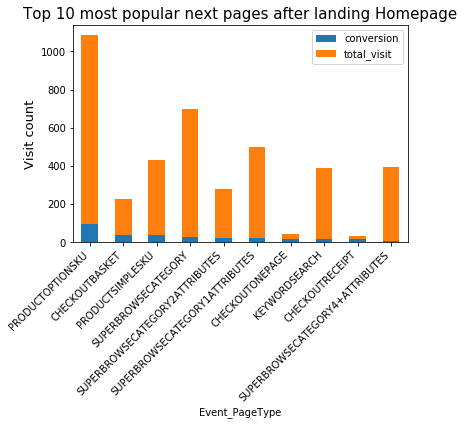

In [37]:
# Plot a bar chart
plot = next_pages.head(10).plot.bar(stacked = True)
labels_3 = ['PRODUCTOPTIONSKU','CHECKOUTBASKET','PRODUCTSIMPLESKU','SUPERBROWSECATEGORY','SUPERBROWSECATEGORY2ATTRIBUTES','SUPERBROWSECATEGORY1ATTRIBUTES','CHECKOUTONEPAGE','KEYWORDSEARCH', 'CHECKOUTRECEIPT','SUPERBROWSECATEGORY4+ATTRIBUTES' ]

plt.ylabel('Visit count', fontsize = 13)
plot.set_xticklabels(plot.set_xticklabels(labels_3), rotation=45, horizontalalignment='right')
plt.title('Top 10 most popular next pages after landing Homepage', fontsize = 15)

#### Question 4: Top ending pages based on 4 types of customers

In [45]:
# Check if any customer has more than 1 exit
exit_page = df[df['Exit'] == 1] [['Event_SessionKey','Exit']].groupby('Event_SessionKey').count().sort_values(['Exit'], ascending=False)
exit_page

,Exit
Event_SessionKey,
5293303984603,1
9875488752099629,1
9863198741230165,1
9862408116738009,1
9858889419912478,1
...,...
4924547859001137,1
4922592985155853,1
4915611131710100,1


In [65]:
exit_page = df[df['Exit'] == 1] [['Exit','Event_PageType','VisitorType']]
exit_page

,Exit,Event_PageType,VisitorType
1,1,PRODUCTSIMPLESKU,Activated Customer
2,1,PRODUCTKIT,Returning Visitor
3,1,SUPERBROWSEHOTDEALS,New Visitor
26,1,DAILYSALESEVENTPAGE,Activated Customer
27,1,CONTENTIDEASADVICE,Activated Customer
...,...,...,...
14372,1,SUPERBROWSECATEGORY1ATTRIBUTES,Returning Visitor
14411,1,PRODUCTOPTIONSKU,Activated Customer
14458,1,PRODUCTOPTIONSKU,Activated Customer
14459,1,PRODUCTSIMPLESKU,Activated Customer


In [66]:
exit_cust_type = exit_page[['VisitorType', 'Exit']].groupby('VisitorType').count().sort_values(['Exit'], ascending=False)
exit_cust_type

,Exit
VisitorType,
Activated Customer,656
New Visitor,515
Returning Visitor,366
Acquired Member,314


In [70]:
# Top ending pages of Activated Customer

exit_ActivatedCustomer = exit_page[exit_page['VisitorType'] == 'Activated Customer'][['Exit','Event_PageType']].groupby('Event_PageType').count().sort_values(['Exit'], ascending=False)
exit_ActivatedCustomer.head()

,Exit
Event_PageType,
PRODUCTOPTIONSKU,144
PRODUCTSIMPLESKU,84
SUPERBROWSEHOTDEALS,78
SUPERBROWSECATEGORY,44
KEYWORDSEARCH,35


In [71]:
# Top ending pages of New Visitor

exit_NewVisitor = exit_page[exit_page['VisitorType'] == 'New Visitor'][['Exit','Event_PageType']].groupby('Event_PageType').count().sort_values(['Exit'], ascending=False)
exit_NewVisitor.head()

,Exit
Event_PageType,
HOMEPAGE,123
SUPERBROWSEHOTDEALS,85
PRODUCTOPTIONSKU,67
KEYWORDSEARCH,41
GATEWAY,35


In [72]:
# Top ending pages of Returning Visitor

exit_ReturningVisitor = exit_page[exit_page['VisitorType'] == 'Returning Visitor'][['Exit','Event_PageType']].groupby('Event_PageType').count().sort_values(['Exit'], ascending=False)
exit_ReturningVisitor.head()

,Exit
Event_PageType,
SUPERBROWSEHOTDEALS,97
PRODUCTOPTIONSKU,64
KEYWORDSEARCH,37
PRODUCTSIMPLESKU,31
SUPERBROWSECATEGORY,28


In [73]:
# Top ending pages of Acquired Member

exit_AcquiredMember = exit_page[exit_page['VisitorType'] == 'Acquired Member'][['Exit','Event_PageType']].groupby('Event_PageType').count().sort_values(['Exit'], ascending=False)
exit_AcquiredMember.head()

,Exit
Event_PageType,
PRODUCTOPTIONSKU,55
SUPERBROWSEHOTDEALS,34
PRODUCTSIMPLESKU,33
HOMEPAGE,22
SUPERBROWSECATEGORY,21


## Question 5: New users per sources

In [82]:
new_user_sources = df[df['VisitorType'] == 'New Visitor'] [['Channel','VisitorType']].groupby('Channel').count().sort_values(['VisitorType'], ascending=False)
new_user_sources

,VisitorType
Channel,
Brand,278
Google Product Ads,119
Search - Organic,78
Search - Paid,56
Social - Paid,21
Display - Acquisition,18
Comparison Shopping,14
Affiliates,12
Other,9
